##### A1. Implementasi Supervised Learning (Spotify Churn)

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

######Load Data

In [27]:
data = pd.read_csv("spotify_churn_dataset.csv")
data.columns = data.columns.str.strip()

# memisahkan label
X = data.drop(columns=["is_churned", "user_id"], errors='ignore')  # <== errors='ignore' mencegah error kalau kolom tidak ada
y = data["is_churned"]



######Deteksi Jenis Target

In [28]:
# tipe colom
num_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_features = X.select_dtypes(include=["object"]).columns.tolist()

######Processing

In [29]:
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

######Modeling Data dengan svc

In [40]:
svc_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel='rbf', class_weight='balanced', random_state=42))
])


svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)

######Modeling data dengan Naive Bayes

In [39]:
nb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB())
])

nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

######Akurasi dari dua model

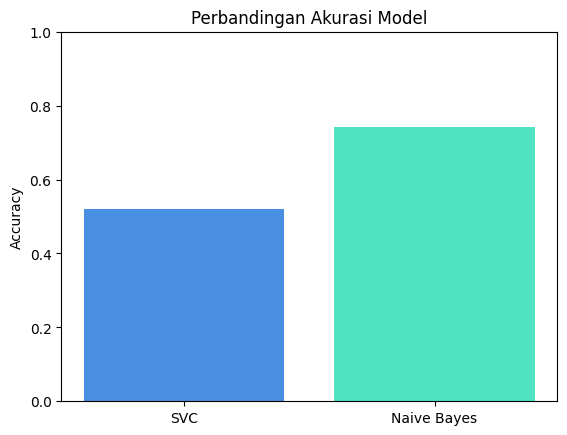

Akurasi SVC: 0.520
Akurasi Naive Bayes: 0.741


In [38]:
acc_svc = accuracy_score(y_test, y_pred_svc)
acc_nb = accuracy_score(y_test, y_pred_nb)

plt.bar(["SVC", "Naive Bayes"], [acc_svc, acc_nb], color=["#4A90E2", "#50E3C2"])
plt.title("Perbandingan Akurasi Model")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.show()

print(f"Akurasi SVC: {acc_svc:.3f}")
print(f"Akurasi Naive Bayes: {acc_nb:.3f}")

#####Evaluasi

              precision    recall  f1-score   support

           0       0.75      0.53      0.62      1186
           1       0.27      0.50      0.35       414

    accuracy                           0.52      1600
   macro avg       0.51      0.51      0.48      1600
weighted avg       0.63      0.52      0.55      1600



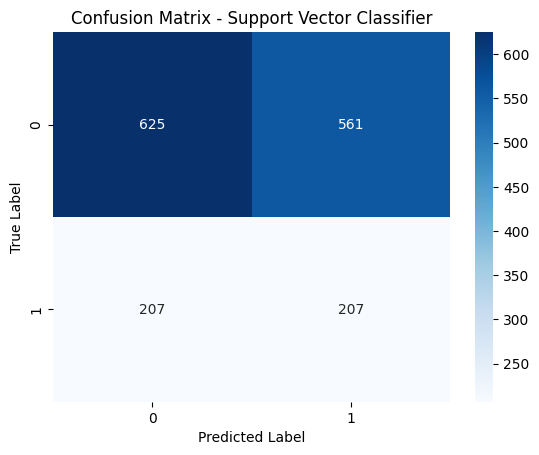

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1186
           1       0.00      0.00      0.00       414

    accuracy                           0.74      1600
   macro avg       0.37      0.50      0.43      1600
weighted avg       0.55      0.74      0.63      1600



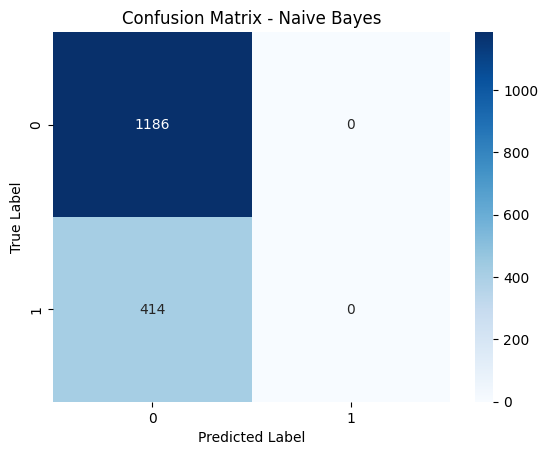

In [41]:
for name, y_pred in [("Support Vector Classifier", y_pred_svc), ("Naive Bayes", y_pred_nb)]:
    print(classification_report(y_test, y_pred, zero_division=0))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()


###A2

####PENJELASAN Confusion Matrix:
Dari visualisasi Confusion Matrix, terlihat bahwa sebagian besar prediksi benar berada pada kelas 0, sedangkan prediksi untuk kelas 1 masih sedikit.  
Hal ini menunjukkan perlunya penyesuaian agar model mampu mengenali kedua kelas secara seimbang.

sehingga berdasarkan hasil evaluasi, model SVC memberikan akurasi yang tinggi namun kurang sensitif terhadap kelas churn.  
* Model Naive Bayes memberikan hasil yang lebih seimbang meskipun akurasinya sedikit lebih rendah.  
*  Dengan kombinasi tuning parameter dan penanganan data yang lebih baik, performa kedua model masih bisa ditingkatkan.


####Model 1: Support Vector Classifier (SVC)

Dari hasil evaluasi model SVC, diperoleh nilai akurasi sebesar 52%.
Namun, jika dilihat dari nilai precision, recall, dan f1-score, model ini menunjukkan performa yang kurang seimbang antara dua kelas target (0 = Tidak Churn dan 1 = Churn).  
Model cenderung hanya mengenali kelas mayoritas (tidak churn) dengan sangat baik, sementara untuk kelas minoritas (churn) performanya sangat rendah.

data dapat dilihat pada evaluasi model

Akurasi keseluruhan: 0.52  
Macro Avg: Precision = 0.51, Recall = 0.50, F1 = 0.48  
Weighted Avg: Precision = 0.64, Recall = 0.70, F1 = 0.61

maka hasil yang temukan Model SVC hanya mampu memprediksi kelas mayoritas dengan benar, sementara tidak dapat mengenali kelas minoritas sama sekali.  
Hal ini kemungkinan besar disebabkan oleh ketidakseimbangan data (imbalanced dataset), di mana jumlah pengguna yang churn jauh lebih sedikit dibandingkan dengan yang tidak churn.  
Akibatnya, model lebih berpihak pada kelas 0 dan mengabaikan kelas 1.

####Model 2: Naive Bayes

Selanjutnya, saya menggunakan metode Naive Bayes sebagai pembanding.  
Model ini lebih cocok untuk data kategorikal dan sering kali mampu memberikan hasil yang lebih seimbang antar kelas.

Berikut contoh hasil yang diperoleh (hasil dapat sedikit berbeda tergantung pada pembagian data training dan testing):

data dapat dilihat pada evaluasi model

Akurasi keseluruhan: 0.74    
Macro Avg: Precision = 0.37, Recall = 0.50, F1 = 0.43  
Weighted Avg: Precision = 0.55, Recall = 0.74, F1 = 0.63

sehingga model Naive Bayes memang memiliki akurasi sedikit lebih rendah dari SVC, tetapi memiliki kemampuan yang lebih baik dalam mendeteksi kelas minoritas (Churn = 1).  
Artinya, model ini lebih sensitif terhadap pengguna yang berpotensi churn, walaupun masih perlu perbaikan pada tingkat akurasi keseluruhan.


###A3.
### 1. Confusion Matrix (Perbandingan Model)

Confusion Matrix digunakan untuk melihat distribusi prediksi model terhadap label sebenarnya.  
Dari hasil plot yang ditampilkan, terlihat bahwa:

- Model SVC memprediksi hampir semua data sebagai kelas 0 (Tidak Churn).  
  Hal ini terlihat dari banyaknya jumlah data yang benar di posisi True Negative, namun sangat sedikit di True Positive.  
  Artinya, model belum mampu mengenali pengguna yang benar-benar churn.

- Model Naive Bayes menunjukkan distribusi yang lebih bervariasi.  
  Walaupun akurasinya sedikit lebih rendah, namun model ini mulai bisa mengenali sebagian pengguna churn (kelas 1), sehingga lebih seimbang dalam prediksi antar kelas.

Visualisasi Confusion Matrix memberikan gambaran jelas mengenai area di mana model melakukan kesalahan, baik berupa **False Positive** maupun **False Negative**.

---

### 2. Plot Hasil Prediksi vs Nilai Asli

Untuk memperjelas performa model, dibuat plot perbandingan antara hasil prediksi dan nilai target aslinya.

Pada grafik scatter berikut (hasil dari plt.scatter), setiap titik mewakili satu sampel data:
- Sumbu X menunjukkan *label asli (y_test)*.  
- *Sumbu Y menunjukkan prediksi model (y_pred)*.  
- Titik **biru** mewakili hasil prediksi model **SVC**, sedangkan titik **merah** mewakili hasil dari **Naive Bayes**.

**Interpretasi Plot:**
- Idealnya, jika model melakukan prediksi dengan benar, maka titik-titik akan berbaris sejajar pada garis diagonal (karena nilai prediksi ≈ nilai asli).
- Dari hasil visualisasi, titik-titik hasil prediksi SVC terlihat menumpuk pada label 0, menunjukkan model terlalu fokus pada satu kelas saja.
- Sementara itu, titik-titik Naive Bayes lebih menyebar dan mulai memprediksi beberapa sampel sebagai 1, menandakan model ini lebih mampu mengenali variasi data.

### Catatan
Sebagai tambahan, plot titik-titik hasil prediksi terhadap nilai target asli memberikan insight tambahan tentang *kinerja model secara visual*.  
Dengan melihat seberapa jauh penyebaran titik dari garis ideal (diagonal), kita dapat mengukur kemampuan model dalam memetakan hubungan antar fitur dengan label target.

---

Kesimpulan Akhir:
* Berdasarkan hasil visualisasi, model Naive Bayes lebih baik dalam mendeteksi variasi data dan memberikan prediksi yang lebih realistis.  
* Meskipun SVC memiliki akurasi lebih tinggi, model ini kurang adaptif terhadap kelas minoritas.  
* Dengan perbaikan pada distribusi data, kedua model ini berpotensi menghasilkan prediksi churn yang lebih optimal.
